In [73]:
import serial
import numpy as np
import time
from matplotlib import pyplot as plt
from ribbn_scripts.hardware_api.hardware import Exciter,Tag

In [74]:
com_port1="COM4"
# try:
#     ser1 = serial.Serial(port=com_port1, baudrate=512000, parity=serial.PARITY_NONE,
#                 stopbits=serial.STOPBITS_ONE, bytesize=serial.EIGHTBITS, timeout=0)
# except Exception as e:
#     print("Couldn't connect.", e)
tag1=Tag(com_port1)
print(tag1.get_mac())

com_port2="COM5"
# try:
#     ser2 = serial.Serial(port=com_port2, baudrate=512000, parity=serial.PARITY_NONE,
#                 stopbits=serial.STOPBITS_ONE, bytesize=serial.EIGHTBITS, timeout=0)
# except Exception as e:
#     print("Couldn't connect.", e)
tag2=Tag(com_port2)
print(tag2.get_mac())


b'EC:62:60:4D:42:60\r\n'
b'94:3C:C6:6D:29:2C\r\n'


Begin reading
Starting MPP
Reading response
could not convert string to float: ''
Begin reading
Starting MPP
Reading response
could not convert string to float: ''
Begin reading
Starting MPP
Reading response
could not convert string to float: ''
Begin reading
Starting MPP
Reading response
could not convert string to float: ''
Begin reading
Starting MPP
Reading response
could not convert string to float: 'end'


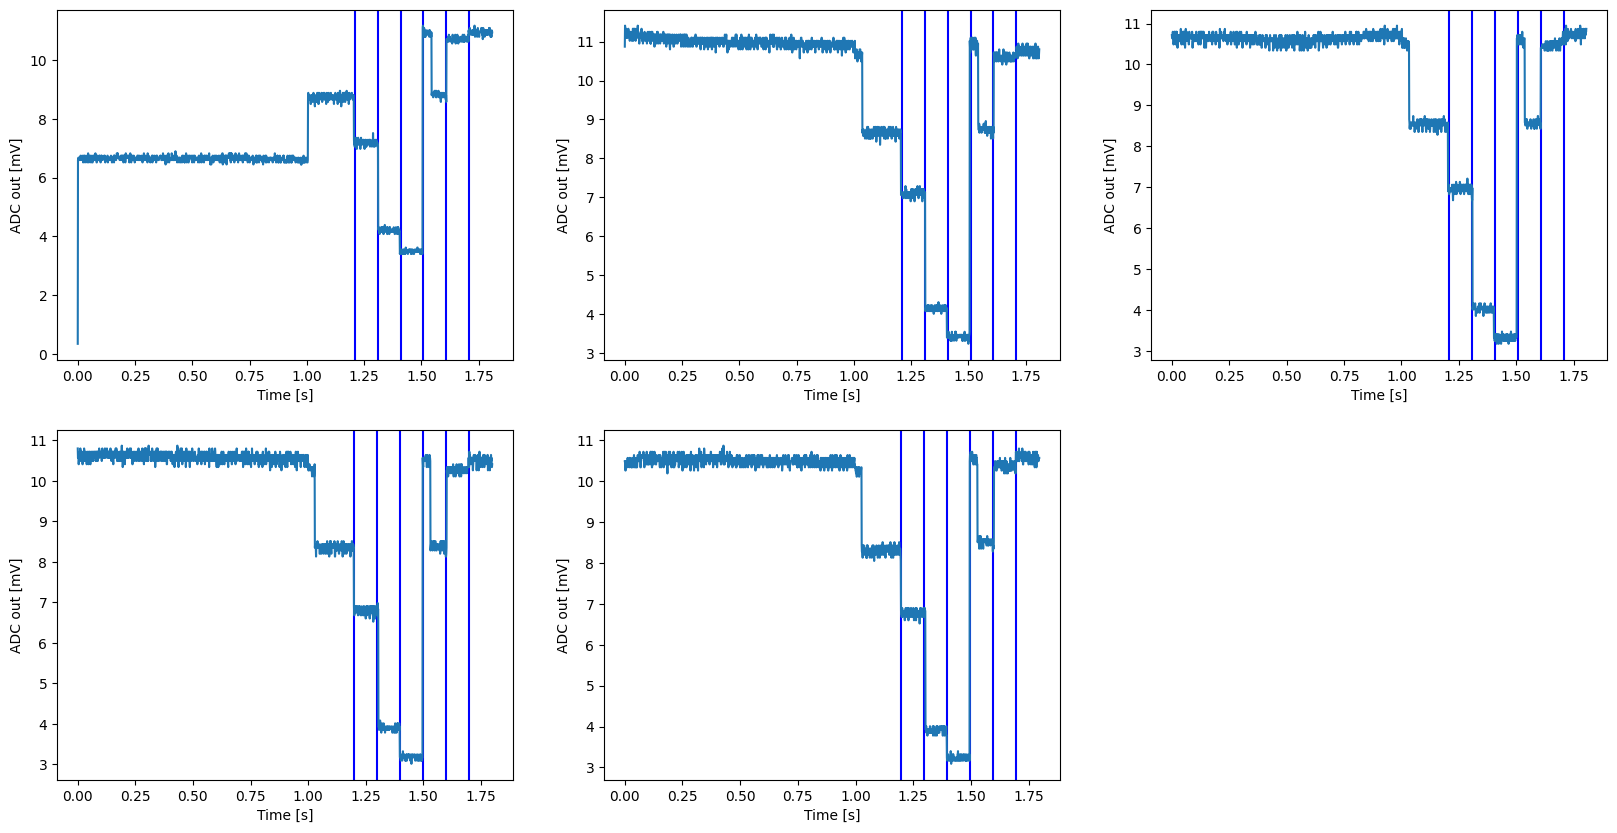

In [75]:
plt.figure(figsize=(20,10))
for rep in range(5):
    plt.subplot(2,3,rep+1)
    print("Begin reading")     
    # ser1.write(b"rdb\0\n")
    # while True:
    #     line = ser1.readline()
    #     if len(line) > 0:
    #         if "rdb" in str(line):
    #             break
    #         else:
    #             print(str(line))
    tag1.begin_reading()

    print("Starting MPP")     
    # mpp_start_time=time.time()
    # ser2.write(b"mpp\0\n")
    # while True:
    #     line = ser2.readline()
    #     if len(line) > 0:
    #         if "mpp" in str(line):
    #             break
    #         else:
    #             print(str(line))
    # mpp_end_time=time.time()
    mpp_start_time,mpp_stop_time=tag2.perform_mpp()

    print("Reading response")
    # ser1.write(b"rds\0\n")
    # time.sleep(0.1)
    # voltages=""

    # read_start_time=time.time()
    # while True:
    #     if time.time()-read_start_time>5: #run max for 20 seconds
    #         break
    #     line = ser1.readline()
    #     if len(line) > 0:
    #         # ss = str(line)
    #         ss = str(line)
    #         print(ss)
            
    #         if "end" in ss:
    #             break
    #         try:
    #             to_add=line.decode()
    #             to_add=to_add.replace("\n",'')
    #             to_add=to_add.replace("\r",'')
    #             voltages+=to_add
    #         except Exception as e:
    #             print(e)
    voltage_readings=tag1.stop_reading()

    mpp_time_elapsed=mpp_stop_time-mpp_start_time
    plot_all_time=np.arange(0,mpp_time_elapsed,mpp_time_elapsed/len(voltage_readings))
    plot_end_time=plot_all_time[-1]
    ver_lines=[]
    for i in range(6):
        ver_lines.append(plot_end_time-0.1*(i+1))

    for v in ver_lines:
        plt.axvline(x = v, color = 'b', label = 'axvline - full height')

    plt.plot(np.arange(0,mpp_time_elapsed,mpp_time_elapsed/len(voltage_readings))[:len(voltage_readings)],voltage_readings)

    plt.xlabel("Time [s]")
    plt.ylabel("ADC out [mV]")

In [76]:
len(voltage_readings)

1761

In [77]:
tag1.disconnect()
tag2.disconnect()

In [78]:
# def clean_voltage_data(voltages):
#     data=voltages.split(',')
#     max_num=int(data[0])
#     data=data[1:]
#     clean_data=[]
#     for d in data:
#         try:
#             clean_data.append(float(d))
#         except Exception as e:
#             print(e)
#     assert(len(clean_data)<=max_num)
    
#     return np.array(clean_data)


In [79]:
import pickle

df=pickle.load(open("C:/Users/Manavjeet Singh/Git/T2TExperiments/Experiments/EstimatingDistSamirOffice/dataframes/0.df","br"))

In [80]:
df.to_csv("deleme.csv")